## Musical_Instrument

# Importing the Required libraries

In [2]:
import gzip
import json
import pandas as pd                                              #importing the pandas library
import numpy as np                                              #importing the numpy library
import seaborn as sns                                            #importing the library for visualisatrion
import matplotlib.pyplot as plt                                  #importing the library for visualisatrion
from tabulate import tabulate                                    #For using the table form to our data
import warnings                                                  #To avoid the shown warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing                                #For the preprocessing purpose
from sklearn.preprocessing import MinMaxScaler,StandardScaler    #for scaling the data
from sklearn.preprocessing import LabelEncoder                   # for converting the object columns to numerical one
from sklearn.preprocessing import StandardScaler                 #for scaling all the features on same scale
from sklearn.cluster import KMeans                               #for making the clusters
from sklearn.neighbors import NearestNeighbors                   #for selecting the clusters
from sklearn.metrics import silhouette_score                     #for checking the accuracy
import scipy.cluster.hierarchy as sch                            #for making the hirerchical graph to selecting the cluster
from sklearn.cluster import AgglomerativeClustering              #for making the hirerchical model
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score


from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report  

# Loading the data

In [3]:
app=list()
for line in open("Musical_Instruments_5.json", 'r'):
    app.append(json.loads(line))
df=pd.DataFrame(app)

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN


# sample review:

"reviewerID": "A3FO5AKVTFRCRJ",  
"asin": "0739079891",  
"reviewerName": "francisco",  
  
"reviewText": "It's good for beginners",  
"overall": 5.0,  
"summary": "Five Stars",  
"unixReviewTime": 1252800000,  
"reviewTime": "09 13, 2009"

# Shape of Data

In [5]:
df.shape

(231392, 12)

# Columns of Data

In [6]:
 df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

# Information and Summary of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231392 entries, 0 to 231391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         231392 non-null  float64
 1   verified        231392 non-null  bool   
 2   reviewTime      231392 non-null  object 
 3   reviewerID      231392 non-null  object 
 4   asin            231392 non-null  object 
 5   reviewerName    231367 non-null  object 
 6   reviewText      231344 non-null  object 
 7   summary         231341 non-null  object 
 8   unixReviewTime  231392 non-null  int64  
 9   vote            34777 non-null   object 
 10  style           121310 non-null  object 
 11  image           3889 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 19.6+ MB


In [8]:
 df.describe()

,overall,unixReviewTime
count,231392.000000,2.313920e+05
mean,4.470448,1.437232e+09
std,0.981586,5.726610e+07
min,1.000000,1.067299e+09
25%,4.000000,1.405901e+09
50%,5.000000,1.443830e+09
75%,5.000000,1.480550e+09
max,5.000000,1.538093e+09


 From the above dataset we can see the characteristics(summary) of the coulumns of our dataset

# Loading the Metadata

In [9]:
meta=[]
for line in open("meta_Musical_Instruments.json", 'r'):
    meta.append(json.loads(line))
df1=pd.DataFrame(meta)

In [10]:
df1.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Musical Instruments, Drums & Percussion, Hand...",,[Cricket Rubbing the spine with the wooden sti...,,Wooden Percussion 2 Piece Set of 3 Inch Cricke...,"[B00NP8GYVS, B00NP80XMO, B00NP8M098]",,WADSUWAN SHOP,"[Wood percussion, Owl whistle*, Includes woode...","[>#141,729 in Musical Instruments (See Top 100...",[],Musical Instruments,,"December 2, 2013",,0000989983,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Musical Instruments, Drums & Percussion, Hand...",,[Frog - Rubbing its spine with the wooden stic...,,"Wooden Percussion 3 Piece Set Frog, Cricket an...","[B00NP8GYVS, B00NP80XMO, B01MY48HK5, B00AZZ1AJ...",,WADSUWAN SHOP,"[Wood percussion, Small 3 inches, Creates orig...","[>#1,622 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"December 2, 2013",$0.91,0000098906,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Musical Instruments, Instrument Accessories, ...",,[Vivaldi's famous set of four violin concertos...,,Hal Leonard Vivaldi Four Seasons for Piano (Or...,[],,Hal Leonard,"[., ., .]","[>#330,653 in Musical Instruments (See Top 100...",[],Musical Instruments,,"May 10, 2011",$62.93,0041291905,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,[],,"[The Turn of the Screw (op. 54) vocal score, p...",,The Turn of the Screw (vocal score),"[0486266842, 0793507669, 0393008789, 142341280...",,Boosey &amp; Hawkes,[],"[>#86,354 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"May 23, 2007",$107.79,0060015500,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,[],,[],,Suite for Organ (including the Trumpet Volunta...,[],,,[],"[>#482,025 in Musical Instruments (See Top 100...",[],Musical Instruments,,"February 8, 2013",,0193757710,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


# Shape of MetaData

In [11]:
df1.shape

(120310, 19)

Here we can see that our Digital_Music_5 dataset have 120310 rows and 19 columns

# Columns of MetaData

In [12]:
 df1.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

# Information and Summary of Metadata

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120310 entries, 0 to 120309
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         120310 non-null  object
 1   tech1            120310 non-null  object
 2   description      120310 non-null  object
 3   fit              120310 non-null  object
 4   title            120310 non-null  object
 5   also_buy         120310 non-null  object
 6   tech2            120310 non-null  object
 7   brand            120310 non-null  object
 8   feature          120310 non-null  object
 9   rank             120310 non-null  object
 10  also_view        120310 non-null  object
 11  main_cat         120310 non-null  object
 12  similar_item     120310 non-null  object
 13  date             120310 non-null  object
 14  price            120310 non-null  object
 15  asin             120310 non-null  object
 16  imageURL         120310 non-null  object
 17  imageURLHi

# NOW WE WILL MERGE BOTH DATASETS TO 1 FOR FURTHER ANALYSIS 

In [14]:
data=pd.merge(df,df1,on='asin')

In [15]:
data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,...,[High-quality Firebrand wood soprano ukulele w...,"[>#24,974 in Musical Instruments (See Top 100 ...","[B01F543PAW, B076KFB49J, B015XD4YLY, B01LYBZ4M...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 10, 2011",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286806,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,...,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
286807,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,...,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
286808,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,...,"[For LP Style Guitar, 500K Full Size Pots with...","[>#58,614 in Musical Instruments (See Top 100 ...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 23, 2016",$1.96,[https://images-na.ssl-images-ama

# Shape of MData

In [15]:
data.shape

(286811, 30)

# Columns of MData

In [16]:
 data.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes', 'details'],
      dtype='object')

# Information and Summary of Mdata

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286811 entries, 0 to 286810
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          286811 non-null  float64
 1   verified         286811 non-null  bool   
 2   reviewTime       286811 non-null  object 
 3   reviewerID       286811 non-null  object 
 4   asin             286811 non-null  object 
 5   reviewerName     286777 non-null  object 
 6   reviewText       286745 non-null  object 
 7   summary          286749 non-null  object 
 8   unixReviewTime   286811 non-null  int64  
 9   vote             40654 non-null   object 
 10  style            156225 non-null  object 
 11  image            4413 non-null    object 
 12  category         286811 non-null  object 
 13  tech1            286811 non-null  object 
 14  description      286811 non-null  object 
 15  fit              286811 non-null  object 
 16  title            286811 non-null  obje

# Pre-processing —— Text Normalization (Text Wrangling)

 Text normalization is defined as a process that consists of a series of steps that should be followed to wrangle, clean, and standardize textual data into a form that could be consumed by other NLP and analytics systems and applications as input.  various  techniques include cleaning text,  removing stopwords and other unnecessary terms, stemming, and lemmatization. Text normalization is also often called text cleansing or wrangling.

Below are various techniques used in the process of text normalization:

Cleaning Text....

Removing Special Characters.....


Removing Stopwords.....


# Checking the missing values in our dataset

In [16]:
 data.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName           34
reviewText             66
summary                62
unixReviewTime          0
vote               246157
style              130586
image              282398
category                0
tech1                   0
description             0
fit                     0
title                   0
also_buy                0
tech2                   0
brand                   0
feature                 0
rank                    0
also_view               0
main_cat                0
similar_item            0
date                    0
price                   0
imageURL                0
imageURLHighRes         0
details                80
dtype: int64

 Here we can see that we don have many missing value in our dataset,so the missing value treatment would be required

In [17]:
data=data.drop(columns='image')
data=data.drop(columns='vote')
data=data.drop(columns='details')

In [18]:
data=data.dropna()

In [19]:
data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,...,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes
36,5.0,True,"05 13, 2014",A37M5LMB7BDGQJ,0786615206,Matt Jones,"Honestly, it's painful to play hunched over at...",Saves my back,1399939200,{'Format:': ' Misc. Supplies'},...,Sageworks,"[Highly recommended by Aaron Shearer, Simple t...","[>#48,224 in Musical Instruments (See Top 100 ...","[B019MIPZ8M, B005QKNUOW, B015CDQ98Q, B0194MNYK...",Musical Instruments,,"July 13, 2007",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
38,5.0,True,"10 27, 2011",A19KOCD0UWK736,0786615206,Doc JD,Where have you been all my life? This should b...,Awesomeness!,1319673600,{'Format:': ' Misc. Supplies'},...,Sageworks,"[Highly recommended by Aaron Shearer, Simple t...","[>#48,224 in Musical Instruments (See Top 100 ...","[B019MIPZ8M, B005QKNUOW, B015CDQ98Q, B0194MNYK...",Musical Instruments,,"July 13, 2007",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
40,4.0,True,"05 19, 2017",AV9E7SJWU0PQ9,1480360295,Keith R. Hopper,So far it works as designed but it needs ridge...,Four Stars,1495152000,{'Format:': ' Electronics'},...,ChordBuddy,[You just found the easiest way to learn guita...,"[>#5,813 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"August 2, 2011",$6.04,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
41,3.0,True,"05 1, 2017",A3CEV9KBYLPK2L,1480360295,william Euarl,Didn't fit my guitar. Other than that it was ok.,Didn't fit my guitar. Other than that it was ...,1493596800,{'Format:': ' Electronics'},...,ChordBuddy,[You just found the easiest way to learn guita...,"[>#5,813 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"August 2, 2011",$6.04,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
42,4.0,True,"01 27, 2017",A2ZPY4IM17L09F,1480360295,Amazon Customer,"seems simple,,,we will see",Four Stars,1485475200,{'Format:': ' Electronics'},...,ChordBuddy,[You just found the easiest way to learn guita...,"[>#5,813 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"August 2, 2011",$6.04,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286800,5.0,True,"02 14, 2018",A29L4DKRIRSDMP,B01HG0FXAI,Alan,Great guitar but pick ups are a bit weak to my...,Weak pick ups,1518566400,"{'Color:': ' 2-Color Sunburst', 'Style:': ' SSS'}",...,Fender,"[Includes deluxe gig bag, Three Vintage Noisel...","[>#117,056 in Musical Instruments (See Top 100...","[B013G7BC8M, B07CTYPNL3, B00VEA6U3Q, B071X7J6H...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 31, 2016",$125.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
286801,5.0,True,"02 13, 2018",A2GFEO12S2Q8BK,B01HG0FXAI,Diane T.,Im a Gibson Custom player but sometimes find a...,"Great sound, great looks. Fun guitar and you g...",1518480000,"{'Color:': ' Sapphire Blue Transparent', 'Styl...",...,Fender,"[Includes deluxe gig bag, Three Vintage Noisel...","[>#117,056 in Musical Instruments (See Top 100...","[B013G7BC8M, B07CTYPNL3, B00VEA6U3Q, B071X7J6H...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 31, 2016",$125.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
286802,3.0,False,"11 17, 2017",A11Y478PJDW2QV,B01HG0FXAI,R. Walker,"Way over-priced, seemed a good deal at first\...","Do not buy online or site unseen, quality vari...",1510876800,"{'Color:': ' Vintage Blonde', 'Style:': ' Elec...",...,Fender,"[Includes deluxe gig bag, Three Vintage Noisel...","[>#117,056 in Musical Ins

In [20]:
data=data.drop(columns='unixReviewTime')

In [21]:
data.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
style              0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

# Converting Datatypes to Relevent form

In [22]:
data['reviewTime']=pd.to_datetime(data['reviewTime'])

In [23]:
data['category']=data['category'].astype(str)

In [24]:
data.dtypes

overall                   float64
verified                     bool
reviewTime         datetime64[ns]
reviewerID                 object
asin                       object
reviewerName               object
reviewText                 object
summary                    object
style                      object
category                   object
tech1                      object
description                object
fit                        object
title                      object
also_buy                   object
tech2                      object
brand                      object
feature                    object
rank                       object
also_view                  object
main_cat                   object
similar_item               object
date                       object
price                      object
imageURL                   object
imageURLHighRes            object
dtype: object

# DUPLICATE VALUE TRAETMENT

In [25]:
data.duplicated(['asin','reviewText','reviewerName','reviewerID']).sum()

39293

In [26]:
data = data.drop_duplicates(subset=['asin','reviewText','reviewerName','reviewerID'], keep='first')
data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,category,...,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes
36,5.0,True,2014-05-13,A37M5LMB7BDGQJ,0786615206,Matt Jones,"Honestly, it's painful to play hunched over at...",Saves my back,{'Format:': ' Misc. Supplies'},"['Musical Instruments', 'Instrument Accessorie...",...,Sageworks,"[Highly recommended by Aaron Shearer, Simple t...","[>#48,224 in Musical Instruments (See Top 100 ...","[B019MIPZ8M, B005QKNUOW, B015CDQ98Q, B0194MNYK...",Musical Instruments,,"July 13, 2007",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
38,5.0,True,2011-10-27,A19KOCD0UWK736,0786615206,Doc JD,Where have you been all my life? This should b...,Awesomeness!,{'Format:': ' Misc. Supplies'},"['Musical Instruments', 'Instrument Accessorie...",...,Sageworks,"[Highly recommended by Aaron Shearer, Simple t...","[>#48,224 in Musical Instruments (See Top 100 ...","[B019MIPZ8M, B005QKNUOW, B015CDQ98Q, B0194MNYK...",Musical Instruments,,"July 13, 2007",,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
40,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,Keith R. Hopper,So far it works as designed but it needs ridge...,Four Stars,{'Format:': ' Electronics'},"['Musical Instruments', 'Instrument Accessorie...",...,ChordBuddy,[You just found the easiest way to learn guita...,"[>#5,813 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"August 2, 2011",$6.04,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
41,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,william Euarl,Didn't fit my guitar. Other than that it was ok.,Didn't fit my guitar. Other than that it was ...,{'Format:': ' Electronics'},"['Musical Instruments', 'Instrument Accessorie...",...,ChordBuddy,[You just found the easiest way to learn guita...,"[>#5,813 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"August 2, 2011",$6.04,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
42,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,Amazon Customer,"seems simple,,,we will see",Four Stars,{'Format:': ' Electronics'},"['Musical Instruments', 'Instrument Accessorie...",...,ChordBuddy,[You just found the easiest way to learn guita...,"[>#5,813 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"August 2, 2011",$6.04,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286800,5.0,True,2018-02-14,A29L4DKRIRSDMP,B01HG0FXAI,Alan,Great guitar but pick ups are a bit weak to my...,Weak pick ups,"{'Color:': ' 2-Color Sunburst', 'Style:': ' SSS'}","['Musical Instruments', 'Guitars', 'Electric G...",...,Fender,"[Includes deluxe gig bag, Three Vintage Noisel...","[>#117,056 in Musical Instruments (See Top 100...","[B013G7BC8M, B07CTYPNL3, B00VEA6U3Q, B071X7J6H...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 31, 2016",$125.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
286801,5.0,True,2018-02-13,A2GFEO12S2Q8BK,B01HG0FXAI,Diane T.,Im a Gibson Custom player but sometimes find a...,"Great sound, great looks. Fun guitar and you g...","{'Color:': ' Sapphire Blue Transparent', 'Styl...","['Musical Instruments', 'Guitars', 'Electric G...",...,Fender,"[Includes deluxe gig bag, Three Vintage Noisel...","[>#117,056 in Musical Instruments (See Top 100...","[B013G7BC8M, B07CTYPNL3, B00VEA6U3Q, B071X7J6H...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 31, 2016",$125.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
286802,3.0,False,2017-11-17,A11Y478PJDW2QV,B01HG0FXAI,R. Walk

# Describing the Data

In [27]:
data.describe()

,overall
count,116836.000000
mean,4.499923
std,0.949808
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Dropping unwanted Columns from Dataset

In [28]:
data=data.drop(['imageURL','imageURLHighRes','also_buy','tech2','similar_item'], axis=1)

In [29]:
data=data.drop(['feature','tech1','fit'], axis=1)

In [30]:
data=data.drop(['rank','date','title'], axis=1)

In [31]:
data=data.drop(['reviewerName','description'], axis=1)

In [32]:
data=data.drop(['also_view'], axis=1)

In [33]:
data['review']=data['reviewText']+data['summary']

In [34]:
data=data.drop(['reviewText','summary'], axis=1)

In [35]:
data

,overall,verified,reviewTime,reviewerID,asin,style,category,brand,main_cat,price,review
36,5.0,True,2014-05-13,A37M5LMB7BDGQJ,0786615206,{'Format:': ' Misc. Supplies'},"['Musical Instruments', 'Instrument Accessorie...",Sageworks,Musical Instruments,,"Honestly, it's painful to play hunched over at..."
38,5.0,True,2011-10-27,A19KOCD0UWK736,0786615206,{'Format:': ' Misc. Supplies'},"['Musical Instruments', 'Instrument Accessorie...",Sageworks,Musical Instruments,,Where have you been all my life? This should b...
40,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,{'Format:': ' Electronics'},"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,$6.04,So far it works as designed but it needs ridge...
41,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,{'Format:': ' Electronics'},"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,$6.04,Didn't fit my guitar. Other than that it was ...
42,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,{'Format:': ' Electronics'},"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,$6.04,"seems simple,,,we will seeFour Stars"
...,...,...,...,...,...,...,...,...,...,...,...
286800,5.0,True,2018-02-14,A29L4DKRIRSDMP,B01HG0FXAI,"{'Color:': ' 2-Color Sunburst', 'Style:': ' SSS'}","['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,$125.99,Great guitar but pick ups are a bit weak to my...
286801,5.0,True,2018-02-13,A2GFEO12S2Q8BK,B01HG0FXAI,"{'Color:': ' Sapphire Blue Transparent', 'Styl...","['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,$125.99,Im a Gibson Custom player but sometimes find a...
286802,3.0,False,2017-11-17,A11Y478PJDW2QV,B01HG0FXAI,"{'Color:': ' Vintage Blonde', 'Style:': ' Elec...","['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,$125.99,"Way over-priced, seemed a good deal at first\..."
286803,4.0,False,2017-04-30,A1QCKX3XFHS87D,B01HG0FXAI,"{'Color:': ' Sapphire Blue Transparent', 'Styl...","['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,$125.99,"There's a lot to like about this guitar, but i..."


## Data Cleaning

### Cleaning Style Column

In [36]:
#cleaning style column
lst=[]
for i in data['style'].items():
    c=0
    if type(i[1]) == dict:
        for j in i[1].items():
            c=j[1]
    if c==0:
        lst.append(np.nan)
    else:
        lst.append(c)

In [37]:
data['style']=lst

In [38]:
import statistics as st

In [39]:
d1=data.groupby(by=['asin'])['style'].agg(st.mode)
d1=pd.DataFrame(d1)
d1['asin']=d1.index
d1.reset_index(inplace=True,drop=True)
d1

,style,asin
0,Misc. Supplies,0786615206
1,Electronics,1480360295
2,K10 Speaker,9792372326
3,Electronics,B00000J50W
4,Compact Sustain Pedal,B00005ML71
...,...,...
3884,Electric Guitar,B01HG0FXAI
3885,Korg PLUGKEYBK -Channel Audio Plug-In,B01HG293XO
3886,Male to 2 Female,B01HGLUP14
3887,Assorted Colors,B01HHJXKRG


In [40]:
for i in d1['style']:
    print(i)

 Misc. Supplies
 Electronics
 K10 Speaker
 Electronics
 Compact Sustain Pedal
 Red
 Lake Placid Blue
 5 Feet
 10 feet
 3 Feet
 10 Feet
 Straight to Right-Angle
 5 feet
 5 Feet
 5 feet
 5 Feet
 15 Feet
 1 Foot
 6.6 Feet
 6.6 Feet
 10 Feet
 6 Inch
 XLR3F to 1/4" TRS
 6 inch
 6 Inch
 9.9 feet
 AT92ECD Phonograph Cartridge
 Replacement Needle
 30 feet
 Original Version
 Silver
 Replacement Needle
 Replacement Needle
 Standard
 50-foot
 1 Pack
 PG48-XLR
 PG58XLR
 Without cable
 PG81XLR
 PG56-XLR
 Phono Cartridge
 Classic
 microKORG
 Cable Not Included
 One Size
 Sunburst
 Liquid Black
 3-pin Male XLR
 6
 With Cable
 Phono Cartridge
 Supercardioid
 Phono Cartridge
 black
 Phono Cartridge
 Right Angle
 Double Braced w/ Extra Strength Tubing
 Hanging Style w/ Saftety Strap
 Standard
 Red
 Black
 6U Rack Space - Shallow
 6U Rack Space
 Black
 Nylon Tip
 Nylon Tip
 DM-70
 Black
 Black
 Traditional
 Ultra Light
 Medium
 Black
 Black
 Black
 .10-.050
 4 String
 1 Pack
 Light .012 .016 .025 .032 .0

 C
 C
 SINGLE
 Rosewood Fretboard
 12
 22 Inch
 chocolate
 20 Feet
 Black
 Regular Light, 10-45
 Ebony
 1 Pack
 Original Version
 Blue Burst
 Voltmeter
 Black
 MultiColored
 multi-coloured
 multi-coloured
 C
 multi-coloured
 Eb
 G
 Natural
 Metallic Black
 Blue
 MKE 400 Microphone
 7/8 Size
 Soprano/Alto
 Microphone
 J1: 554-590 MHz
 natural
 Silver
 Black
 Black
 Black
 Pedal
 Black
 Brown
 White Accents
 White Accents
 Black
 88 Note
 Silver
 Black
 BLACK
 25 Ft.
 Transparent Blue
 Angel Of Deth Graphic
 Red
 Black
 Black Leather
 Tweed
 Black
 Standard Packaging
 GX3 300W Amp
 6 Feet
 12 Feet
 14 Inch
 3 Pack
 Rosewood Fretboard
 Hennessey 7200B Strap Locks Black
 WS6 Deluxe Windshield
 12 Foot
 Black
 White
 Black
 Midnight Sky Blue
 Assorted Colors
 Black
 Triple
 Brown
 TENOR GUITAR
 4 Spaces
 Black
 Baritone
 0.38mm
 One Mic Pre
 12 Feet
 Classic
 Standard Shape
 Green/Black
 Nickel
 3 Woofer
 Soprano/Alto
 Narrow
 Silver
 Black
 1,100-Watt
 Custom Light .011 .015 .023 .032 .042

 TM-PC1-2
 1 Pack
 Speaker Stand
 1Pair
 4Ply Tortoise Shell
 20 Pattern
 Grey
 12" speaker
 400I
 0.917 Foot (11 Inch)
 blue
 Output: DC 9V, 400mA
 w/ 10" Throne
 Lightning
 Black
 Mahogany
 Assorted
 Transparent Blue
 Strength 3
 Black
 Strength 3
 Red on Black
 Recorder
 White
 MultiColored
 4-inch Woofer
 Channel D
 1
 8-Inch (pair)
 Keyboard
 Medium
 A Band
 Multi-Color
 Original Version
 Maple
 Tone Job
 The Depths Modulation
 Dirt Transmitter Fuzz
 Levitation
 Greenburst
 Palisades Overdrive
 DVD-ROM
 Black
 Black
 Original Version
 24 Pack - Assorted Colors
 MultiColored
 Strat Neck
 Silver
 Integrated Flash
 Blue Swirl Pearl
 MultiColored
 Orange
 Mixed
 Red
 Maple
 Black
 Digital Piano
 Jazz Bass
 olympic white
 Single
 Black
 Spruce Top
 Black
 MultiColored
 Red/Black
 natural satin
 Blue
 EXH-6
 Original Version
 Aqua Pearl
 Aqua Pearl
 Natural
 MultiColored
 Red
 Bit Commander V2
 Black
 MultiColored
 Medium/Heavy Blue
 5" Monitor Speaker
 Black
 1 Piece
 one size
 Satin B

In [41]:
data1=pd.merge(data,d1,left_on='asin',right_on='asin')
data1.drop('style_x',axis=1,inplace=True)
data1.rename(columns={'overall':'Rating','style_y':'Style'},inplace=True)

In [42]:
data=data1.copy()
data.head()

,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style
0,5.0,True,2014-05-13,A37M5LMB7BDGQJ,0786615206,"['Musical Instruments', 'Instrument Accessorie...",Sageworks,Musical Instruments,,"Honestly, it's painful to play hunched over at...",Misc. Supplies
1,5.0,True,2011-10-27,A19KOCD0UWK736,0786615206,"['Musical Instruments', 'Instrument Accessorie...",Sageworks,Musical Instruments,,Where have you been all my life? This should b...,Misc. Supplies
2,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,$6.04,So far it works as designed but it needs ridge...,Electronics
3,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,$6.04,Didn't fit my guitar. Other than that it was ...,Electronics
4,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,$6.04,"seems simple,,,we will seeFour Stars",Electronics


## Cleaning in Price Column

converting the datatype of price column to float.

In [43]:
data['price']=data['price'].str.strip("$")
data['price']=data['price'].apply(lambda x:pd.to_numeric(str(x).strip("'"),errors='coerce'))

In [44]:
for i in range(2000):
    data['price']=data['price'].interpolate(method='linear',limit=5)

In [45]:
data['price'].isnull().sum()

2

In [46]:
data.dropna(inplace=True)

In [47]:
data.shape

(116834, 11)

we have to analyze only the 
musical instrument

In [48]:
data['main_cat'].value_counts()

data = data[data['main_cat']=='Musical Instruments']

In [49]:
data

,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style
2,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,So far it works as designed but it needs ridge...,Electronics
3,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,Didn't fit my guitar. Other than that it was ...,Electronics
4,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,"seems simple,,,we will seeFour Stars",Electronics
5,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,I'm thrilled with this system for learning gui...,Electronics
6,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,this has helped me so much in learning how to ...,Electronics
...,...,...,...,...,...,...,...,...,...,...,...
116831,5.0,True,2018-02-14,A29L4DKRIRSDMP,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,Great guitar but pick ups are a bit weak to my...,Electric Guitar
116832,5.0,True,2018-02-13,A2GFEO12S2Q8BK,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,Im a Gibson Custom player but sometimes find a...,Electric Guitar
116833,3.0,False,2017-11-17,A11Y478PJDW2QV,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,"Way over-priced, seemed a good deal at first\...",Electric Guitar
116834,4.0,False,2017-04-30,A1QCKX3XFHS87D,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,"There's a lot to like about this guitar, but i...",Electric Guitar


In [50]:
data['category'].value_counts()

['Musical Instruments', 'Instrument Accessories', 'Guitar & Bass Accessories', 'Picks & Pick Holders', 'Picks']         5854
['Musical Instruments', 'Instrument Accessories', 'Guitar & Bass Accessories', 'Strings', 'Electric Guitar Strings']    5746
['Musical Instruments', 'Instrument Accessories', 'Guitar & Bass Accessories', 'Tuners']                                5108
['Musical Instruments', 'Live Sound & Stage', 'Stage & Studio Cables', 'Instrument Cables']                             4352
['Musical Instruments', 'Instrument Accessories', 'Guitar & Bass Accessories', 'Strings', 'Acoustic Guitar Strings']    4242
                                                                                                                        ... 
['Musical Instruments', 'Wind & Woodwind Instruments', 'Folk & World', 'Shofars']                                          3
['Musical Instruments', 'Instrument Accessories', 'Wind & Woodwind Accessories', 'Reeds', 'Bassoon']                       3


In [51]:
data=data.dropna(axis=0)

In [52]:
data=data.reset_index()

In [53]:
data=data.drop(['index'], axis=1)

In [48]:
#data.to_csv("capstone project")

In [54]:
data

,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,So far it works as designed but it needs ridge...,Electronics
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,Didn't fit my guitar. Other than that it was ...,Electronics
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,"seems simple,,,we will seeFour Stars",Electronics
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,I'm thrilled with this system for learning gui...,Electronics
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,this has helped me so much in learning how to ...,Electronics
...,...,...,...,...,...,...,...,...,...,...,...
114115,5.0,True,2018-02-14,A29L4DKRIRSDMP,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,Great guitar but pick ups are a bit weak to my...,Electric Guitar
114116,5.0,True,2018-02-13,A2GFEO12S2Q8BK,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,Im a Gibson Custom player but sometimes find a...,Electric Guitar
114117,3.0,False,2017-11-17,A11Y478PJDW2QV,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,"Way over-priced, seemed a good deal at first\...",Electric Guitar
114118,4.0,False,2017-04-30,A1QCKX3XFHS87D,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,"There's a lot to like about this guitar, but i...",Electric Guitar


In [111]:
#data.to_csv('happyhappy',columns=['price','asin','overall','verified','reviewTime','category','brand'])

# Finding nunique values in Dataset

In [55]:
for i in data.columns:
    print(i,':',data[i].nunique())

Rating : 5
verified : 2
reviewTime : 3482
reviewerID : 26890
asin : 3790
category : 515
brand : 747
main_cat : 1
price : 11198
review : 102173
Style : 1883


# LEVEL 1 Analysis

Identify the type of data in each column (categorical or numerical)?
Seperate out the categorical columns from the numerical types
These are the kinds of analysis that can be performed on categorical data

Check if the variable is Nominal or Ordinal.Check how many categories are present.Check the Mode.Check for Missing values.Think about how the missing values could be treated?What kind of graph/chart can be plotted using this data?
Note: We are analyzing only one column at a time (Univariate Analysis)

# Separating Categorical and Numerical Variables

In [56]:
# Separating out the categorical and continuous variables
def seprate_data_types(data):
    categorical = []
    continuous = []
    for column in data.columns:                # looping on the number of columns
        if data[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(data)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ------------
Rating         reviewTime
verified       reviewerID
main_cat       asin
               category
               brand
               price
               review
               Style


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

# Level 1 Analysis (Univariate Analysis)

# User defined functions for level 1 analysis of categorical columns

This function will check for the following: \
Unique values \
Mode \
Sum of all the null values \
Total count of missing values

In [57]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [58]:
def num_info(col):
    print(f"The mean of the {data.columns[col]} is {data[data.columns[col]].mean()}")
    print(f"The median of the {data.columns[col]} is {data[data.columns[col]].median()}")
    print(f"The standard deviation of the {data.columns[col]} is {data[data.columns[col]].std()}")
    print(f"Number of missing values in the {data.columns[col]} is {data[data.columns[col]].isnull().sum()}")

In [64]:
# labels=list()
# for i in df['sentiment'].unique():
#     labels.append(i)

In [65]:
# values=list()
# for i in df['sentiment'].value_counts():
#     values.append(i)

In [241]:
# # visualizing distribution of sentiments
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots

# colors = ['salmon', 'gold', 'palegreen', 'hotpink','mediumturquoise']
# fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
# fig.add_trace(go.Pie(labels=labels, values=values, name="Musical_Instrument",hole=.3),row=1,col= 1)

# fig.update_layout(
#     title_text="Distribution of Sentiments",title_x = 0.5,font=dict(size=15),
#     # Add annotations in the center of the donut pies.
#     annotations=[dict(text='Musical_Instrument', x=0.185, y=0.5, font_size=15, showarrow=False)])
# fig.update_traces(marker=dict(colors=colors, line=dict(color='black', width=1.5)))
# fig.show()

# 1. Analysis of Overall: 

In [60]:
 info_of_cat("overall") 

Unique values in overall are: [5. 4. 1. 3. 2.]
Mode of overall is 5.0
Number of missing values in overall is 0


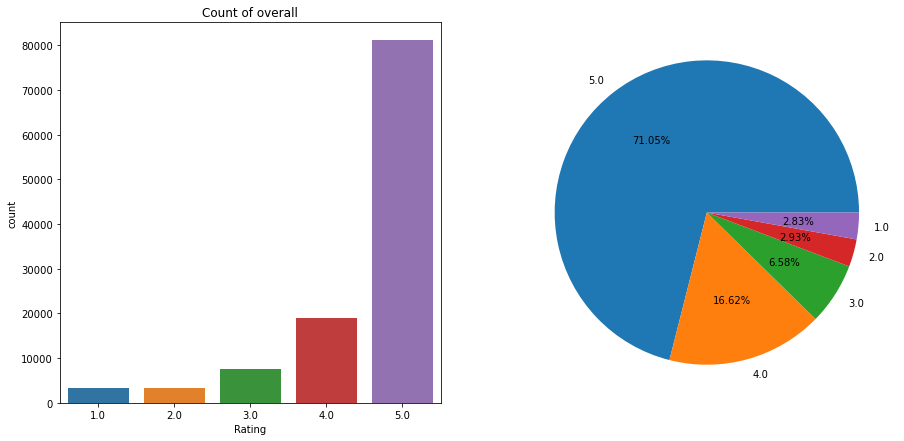

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of overall")                  # Set the title of the graph
percentage = data["Rating"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["Rating"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["Rating"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

Interpretation: Dataset indicates that 16% of the customers left the bank while 84% of the customers are still with it.

# 2. Analysis of  Verified column: Verification of a person (YES or NO)

In [62]:
 info_of_cat("verified")

Unique values in verified are: [ True False]
Mode of verified is True
Number of missing values in verified is 0


# Visualizing Number Of Verified Reviews

Text(0.5, 1.0, 'Verified Reviews')

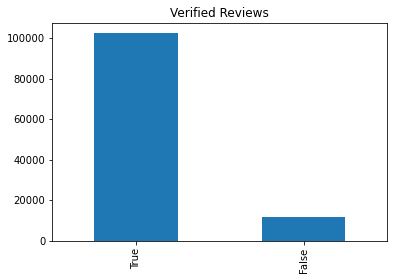

In [66]:
data['verified'].value_counts().plot(kind='bar')
plt.title('Verified Reviews')

From the graph above we can see that more numbers of reviews are verified

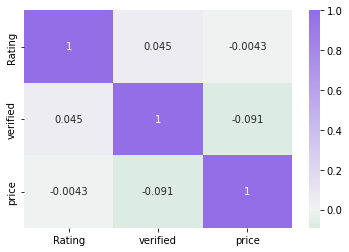

In [67]:
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(data.corr(), annot=True,center=0, cmap=colors, robust=True)
plt.show()

In [68]:
df11=data.groupby(by='brand').mean()
df11

,Rating,verified,price
brand,,,
,4.329787,0.957447,38.099131
1 BY ONE,4.000000,0.923077,14.861017
1byone,4.293103,0.879310,16.993651
A2S Protection,4.625000,0.875000,52.990000
ACE,4.500000,1.000000,24.990000
...,...,...,...
makanu,4.485714,0.914286,8.957429
mono,4.457143,0.847619,106.899569
niceeshop,4.000000,1.000000,12.853889


# TOP 10 BRANDS 

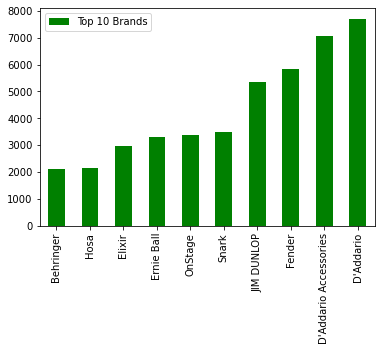

In [69]:
top=pd.DataFrame({'Top 10 Brands':(data.brand.value_counts()[:10])})
top.sort_values('Top 10 Brands').plot.bar(color='g')
plt.show()

The Most Popular Brand is D'Addario

# Finding The Top 10 Reviews

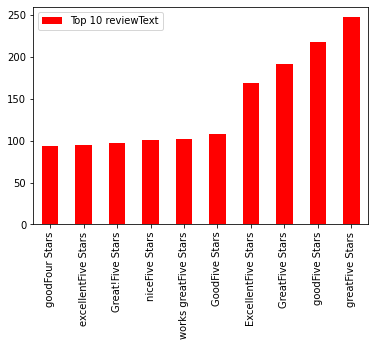

In [70]:
top=pd.DataFrame({'Top 10 reviewText':(data.review.value_counts()[:10])})
top.sort_values('Top 10 reviewText').plot.bar(color='r')
plt.show()

From the graph above we can see that maximum no of reviwes are for (good) and lowest are for (works great)

# Finding The Top 10 categories

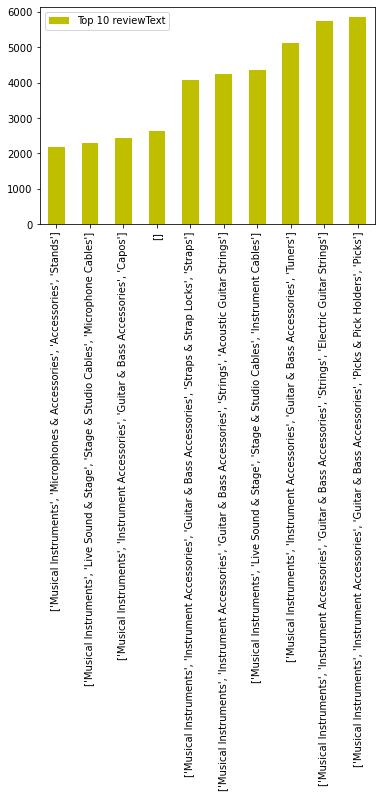

In [71]:
top=pd.DataFrame({'Top 10 reviewText':(data.category.value_counts()[:10])})
top.sort_values('Top 10 reviewText').plot.bar(color='y')
plt.show()

# Finding The Top 10 Pricest MuscialInstrument

In [64]:
# top=pd.DataFrame({'Top 10 Price':(data.price.value_counts()[:5])})
# top.sort_values('Top 10 Price').plot.bar()
# plt.show()

Top affordable Price is $0.91

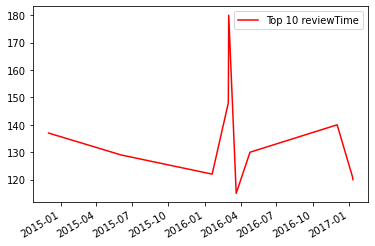

In [72]:
top3=pd.DataFrame({'Top 10 reviewTime':(data.reviewTime.value_counts()[:10])})
top3.sort_values('Top 10 reviewTime').plot.line(color='r')
plt.show()

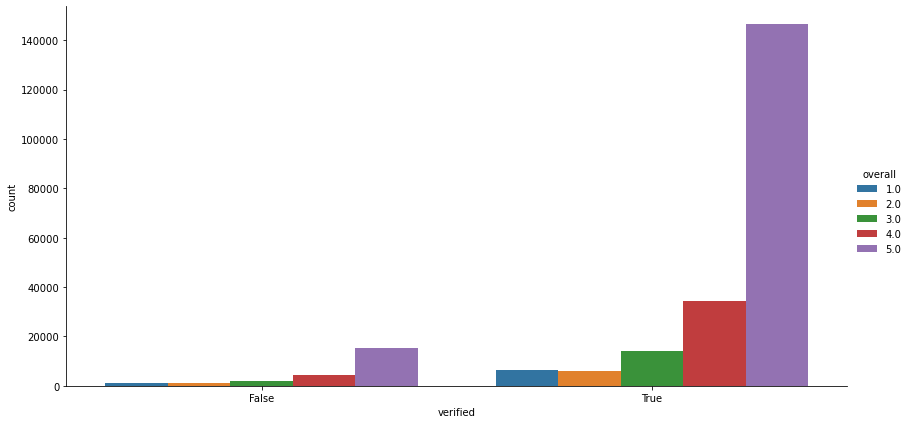

In [73]:
sns.catplot(data=df,x="verified",hue="overall",kind="count",height=6,aspect=2)

# Analysis of reviewTime

In [67]:
#num_info('reviewTime')

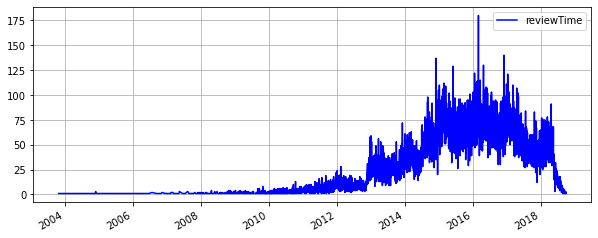

In [74]:
data['reviewTime'].value_counts().to_frame().plot(color='b',figsize=(10,4))
plt.grid()

In [75]:
data

,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,So far it works as designed but it needs ridge...,Electronics
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,Didn't fit my guitar. Other than that it was ...,Electronics
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,"seems simple,,,we will seeFour Stars",Electronics
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,I'm thrilled with this system for learning gui...,Electronics
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,this has helped me so much in learning how to ...,Electronics
...,...,...,...,...,...,...,...,...,...,...,...
114115,5.0,True,2018-02-14,A29L4DKRIRSDMP,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,Great guitar but pick ups are a bit weak to my...,Electric Guitar
114116,5.0,True,2018-02-13,A2GFEO12S2Q8BK,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,Im a Gibson Custom player but sometimes find a...,Electric Guitar
114117,3.0,False,2017-11-17,A11Y478PJDW2QV,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,"Way over-priced, seemed a good deal at first\...",Electric Guitar
114118,4.0,False,2017-04-30,A1QCKX3XFHS87D,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,"There's a lot to like about this guitar, but i...",Electric Guitar




# Sentiment Analysis

In [76]:
import re,string

# Data cleaning and removing special characters

One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML

In [77]:
def data_cleaning(t):       
    t = str(t).lower()
    t = re.sub('\[.*?\]', '', t)
    t = re.sub('https?://\S+|www\.\S+', '', t)
    t = re.sub('<.*?>+', '', t)
    t = re.sub('[%s]' % re.escape(string.punctuation), '', t)
    t = re.sub('\n', '', t)
    t = re.sub('\w*\d\w*', '', t)
    return t


In [78]:
data['review']=data['review'].apply(lambda x:data_cleaning(x))

In [79]:
data.review

0         so far it works as designed but it needs ridge...
1         didnt fit my guitar  other than that it was ok...
2                         seems simplewe will seefour stars
3         im thrilled with this system for learning guit...
4         this has helped me so much in learning how to ...
                                ...                        
114115    great guitar but pick ups are a bit weak to my...
114116    im a gibson custom player but sometimes find a...
114117    way overpriced  seemed a good deal at firstbut...
114118    theres a lot to like about this guitar but its...
114119    i am speechless this guitar is so beautiful su...
Name: review, Length: 114120, dtype: object

# Removing stop words

Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords

In [80]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
spacy_stopwords=spacy.lang.en.stop_words.STOP_WORDS

In [81]:
spacy_stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

some stop words like enough,good,five can be the expression of the customers and can be in the postive side of the reviews

In [82]:
spacy_stopwords=spacy_stopwords-{"not",'still','nothing',"n't",'empty','enough','cannot', 'could','good','except','bad','five','star','pretty','better','poor','must','most','does', 'although'}

In [83]:
data['review']=data['review'].apply(lambda x: ' '.join([i for i in x.split() if i not in spacy_stopwords]))

In [84]:
data['review']

0         far works designed needs ridges help develope ...
1                       didnt fit guitar okdidnt fit guitar
2                                    simplewe seefour stars
3         im thrilled system learning guitar ive wanted ...
4                helped learning play chords easefour stars
                                ...                        
114115    great guitar pick ups bit weak taste stratocas...
114116    im gibson custom player find fender fun differ...
114117    way overpriced good deal firstbut bewarethey h...
114118    theres lot like guitar not perfect im happy it...
114119    speechless guitar beautiful sunburst action sm...
Name: review, Length: 114120, dtype: object

In [85]:
 def text_process(review):
     """
    Takes in a string of text, then perform the following:
    1. Remove all punctuations
    2. Remove all stopwords
    3. Return a list of cleaned text
    """
     # Check characters to see if they are in punctuation
     nopunc = [char for char in review if char not in string.punctuation]
    
    # Join the characters again to form the string
     nopunc = ''.join(nopunc)

In [86]:
df=data.copy()

In [87]:
df

,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Electronics
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Electronics
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Electronics
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Electronics
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Electronics
...,...,...,...,...,...,...,...,...,...,...,...
114115,5.0,True,2018-02-14,A29L4DKRIRSDMP,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,great guitar pick ups bit weak taste stratocas...,Electric Guitar
114116,5.0,True,2018-02-13,A2GFEO12S2Q8BK,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,im gibson custom player find fender fun differ...,Electric Guitar
114117,3.0,False,2017-11-17,A11Y478PJDW2QV,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,way overpriced good deal firstbut bewarethey h...,Electric Guitar
114118,4.0,False,2017-04-30,A1QCKX3XFHS87D,B01HG0FXAI,"['Musical Instruments', 'Guitars', 'Electric G...",Fender,Musical Instruments,125.99,theres lot like guitar not perfect im happy it...,Electric Guitar


In [88]:
df.head()

,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Electronics
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Electronics
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Electronics
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Electronics
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Electronics


# Sentiment distribution based on polarity scores

## TextBlob
#### finding sentiments by creating polarity score of review_text 

In [89]:
from textblob import TextBlob

In [90]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity'] = df['review'].apply(getPolarity)

In [91]:
def polarity_sentiment(polarity):
    
    '''Returns the sentiment of the polarity'''
    
    if polarity < 0:
        sentiment_type = 'Negative'
    elif polarity >= 0.1:
        sentiment_type = 'Positive'
    else:
        sentiment_type = 'Neutral'
        
    return sentiment_type

In [92]:
df['sentiment'] = df['polarity'].apply(polarity_sentiment)

In [93]:
df=df.reset_index()


In [94]:
df=df.drop(['index'], axis=1)

# Sentiment type based on polarity score

In [95]:
df.head()

,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style,polarity,sentiment
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Electronics,0.100000,Positive
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Electronics,0.400000,Positive
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Electronics,0.000000,Neutral
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Electronics,0.354618,Positive
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Electronics,0.000000,Neutral


In [96]:
df.shape

(114120, 13)

# Sentiment distribution among reviews

<AxesSubplot:>

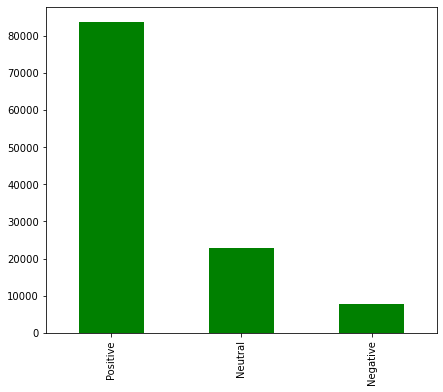

In [97]:
df['sentiment'].value_counts().plot(kind='bar',figsize=(7,6),color='g')

More positive reviews overall throughout the years - unbalanced data distribution

Since the polar values are always sensitive- considering only positive and negative reviews

In [98]:
df_pos = df[df['sentiment']=='Positive']
df_neg = df[df['sentiment']=='Negative']

print('Positive reviews:',df_pos.shape)
print('Negative reviews:',df_neg.shape)

Positive reviews: (83608, 13)
Negative reviews: (7695, 13)


# CLASSIFICATION 

# Taking measures For Our models

In [99]:
test=df.loc[:,['review','sentiment']]
test

,review,sentiment
0,far works designed needs ridges help develope ...,Positive
1,didnt fit guitar okdidnt fit guitar,Positive
2,simplewe seefour stars,Neutral
3,im thrilled system learning guitar ive wanted ...,Positive
4,helped learning play chords easefour stars,Neutral
...,...,...
114115,great guitar pick ups bit weak taste stratocas...,Positive
114116,im gibson custom player find fender fun differ...,Positive
114117,way overpriced good deal firstbut bewarethey h...,Positive
114118,theres lot like guitar not perfect im happy it...,Positive


# LabelEncode Our Data

In [100]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [101]:
test['sentiment']=label.fit_transform(test['sentiment'])    #sentiment column get label encoded for future predicts
test

,review,sentiment
0,far works designed needs ridges help develope ...,2
1,didnt fit guitar okdidnt fit guitar,2
2,simplewe seefour stars,1
3,im thrilled system learning guitar ive wanted ...,2
4,helped learning play chords easefour stars,1
...,...,...
114115,great guitar pick ups bit weak taste stratocas...,2
114116,im gibson custom player find fender fun differ...,2
114117,way overpriced good deal firstbut bewarethey h...,2
114118,theres lot like guitar not perfect im happy it...,2


# Spliting Our Data Into Training & Split test

In [102]:
from sklearn.model_selection import train_test_split


In [103]:
X=test['review']               
y=test['sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=85)  #splitting data into 30:70 ratio 

In [104]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(79884,) (34236,) (79884,) (34236,)


In [151]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape
X_test_counts = count_vect.transform(X_test)
X_test_counts.shape
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(34236, 108313)

# MODEL1:-Naive Bayes

In [152]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()


# Importing Libraries For Model Creations

In [153]:
import nltk
#nltk.download('stopwords')

In [154]:
#!pip install imblearn

In [155]:
import spacy                                                  # Import spaCy library

from nltk.corpus import stopwords
stop_words_nltk = stopwords.words('english')                           # Load model
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import imblearn
print(imblearn.__version__)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

0.10.1


# Defining a Funct For easy Prediction

In [156]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)         #vecrorizing our data
    X_test=vectorizer.transform(input_test)
    clf=classifier.fit(X_train,label_train)              # putting the ml model
    y_pred=clf.predict(X_test)                          # prediction trough fitting the model in data 
    plot_confusion_matrix(clf,X_test,label_test)        # plotting the matrix
    print(classification_report(label_test,y_pred))      # printing classification report of our model
    print('accuracy:', accuracy_score(label_test, y_pred))             
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2308
           1       0.97      0.29      0.44      6946
           2       0.77      1.00      0.87     24982

    accuracy                           0.79     34236
   macro avg       0.58      0.43      0.44     34236
weighted avg       0.76      0.79      0.73     34236

accuracy: 0.7864236476223858
recall: 0.7864236476223858
f1-score: 0.7263408471099262
precision: 0.7624637984277916


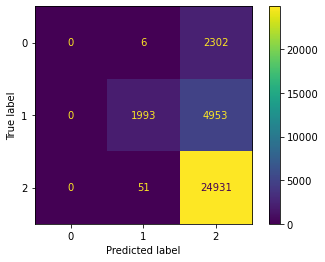

In [157]:
label_test,final,vectorizer=funct(clf,X_train,X_test,y_train,y_test)

In [158]:
final.Predict.value_counts()

2    32186
1     2050
Name: Predict, dtype: int64

# Model2:-LogisticRegression

In [159]:
clf1=LogisticRegression()

In [160]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)
    X_test=vectorizer.transform(input_test)
    clf1=classifier.fit(X_train,label_train)
    y_pred=clf1.predict(X_test)
    plot_confusion_matrix(clf1,X_test,label_test)
    print(classification_report(label_test,y_pred))
    print('accuracy:', accuracy_score(label_test, y_pred))
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.74      0.43      0.55      2308
           1       0.79      0.71      0.75      6946
           2       0.92      0.98      0.95     24982

    accuracy                           0.89     34236
   macro avg       0.82      0.71      0.75     34236
weighted avg       0.88      0.89      0.88     34236

accuracy: 0.8895022783035401
recall: 0.8895022783035401
f1-score: 0.88172309670199
precision: 0.8817461256021077


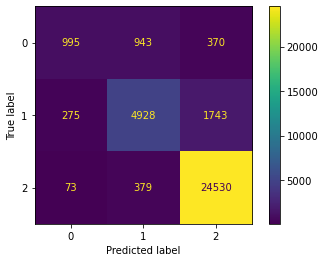

In [161]:
label_test,final,vectorizer=funct(clf1,X_train,X_test,y_train,y_test)

# Model3:- DecisionTreeClassifier

In [162]:
from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier()


In [163]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)
    X_test=vectorizer.transform(input_test)
    clf2=classifier.fit(X_train,label_train)
    y_pred=clf2.predict(X_test)
    plot_confusion_matrix(clf2,X_test,label_test)
    print(classification_report(label_test,y_pred))
    print('accuracy:', accuracy_score(label_test, y_pred))
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.59      0.54      0.57      2308
           1       0.77      0.75      0.76      6946
           2       0.92      0.93      0.93     24982

    accuracy                           0.87     34236
   macro avg       0.76      0.74      0.75     34236
weighted avg       0.87      0.87      0.87     34236

accuracy: 0.8692896366397944
recall: 0.8692896366397944
f1-score: 0.8677522121656821
precision: 0.8665208642878266


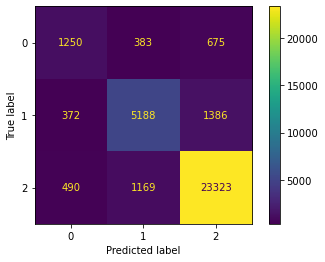

In [164]:
label_test,final,vectorizer=funct(clf2,X_train,X_test,y_train,y_test)

# Model4:- RandomForestClassifier

In [165]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier()


In [166]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)
    X_test=vectorizer.transform(input_test)
    clf3=classifier.fit(X_train,label_train)
    y_pred=clf3.predict(X_test)
    plot_confusion_matrix(clf3,X_test,label_test)
    print(classification_report(label_test,y_pred))
    print('accuracy:', accuracy_score(label_test, y_pred))
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.96      0.17      0.29      2308
           1       0.95      0.61      0.74      6946
           2       0.85      1.00      0.92     24982

    accuracy                           0.86     34236
   macro avg       0.92      0.59      0.65     34236
weighted avg       0.88      0.86      0.84     34236

accuracy: 0.8616368734665265
recall: 0.8616368734665265
f1-score: 0.8380105878179903
precision: 0.8752217807698858


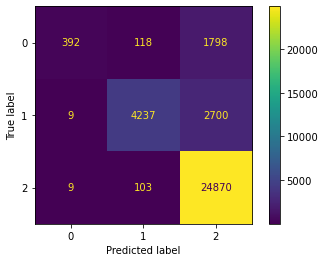

In [167]:
label_test,final,vectorizer=funct(clf3,X_train,X_test,y_train,y_test)

# Model5:- AdaBoostClassifier

In [116]:
from sklearn.ensemble import AdaBoostClassifier
clf4=AdaBoostClassifier()

In [117]:
def funct(classifier,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
    X_train=vectorizer.fit_transform(input_train)
    X_test=vectorizer.transform(input_test)
    clf4=classifier.fit(X_train,label_train)
    y_pred=clf4.predict(X_test)
    plot_confusion_matrix(clf4,X_test,label_test)
    print(classification_report(label_test,y_pred))
    print('accuracy:', accuracy_score(label_test, y_pred))
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final=pd.DataFrame(X_test)
    final['Predict']=y_pred
    return label_test,final,vectorizer

              precision    recall  f1-score   support

           0       0.67      0.21      0.32      4483
           1       0.66      0.41      0.51     12797
           2       0.83      0.97      0.89     47609

    accuracy                           0.81     64889
   macro avg       0.72      0.53      0.58     64889
weighted avg       0.79      0.81      0.78     64889

accuracy: 0.8065003313350491
recall: 0.8065003313350491
f1-score: 0.7787523638840372
precision: 0.7864066102361332


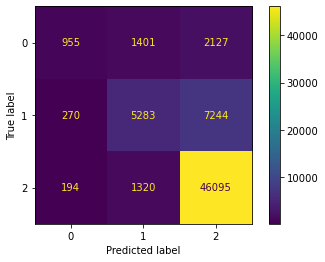

In [118]:
label_test,final,vectorizer=funct(clf4,X_train,X_test,y_train,y_test)

**COMAPARISION**

Navye Byes:-accuracy: 0.8772100217629814
       ,recall: 0.8772100217629814
       ,f1-score: 0.8223358176354953
       ,precision: 0.8923273697652919
Loggistic:-accuracy: 0.9069767441860465
`      ,recall: 0.9069767441860465
       ,f1-score: 0.889477614208318
       ,precision: 0.8893875929222128
Decision Tree:-accuracy: 0.8569398730192989
      ,recall: 0.8569398730192989
      ,f1-score: 0.8532573661870194
      ,precision: 0.849935858595231
Random Forest:-accuracy: 0.8927858414719689
,recall: 0.8927858414719689
,f1-score: 0.859930940707845
,precision: 0.8871851065562397
Ada Boast:-accuracy: 0.8880555405672764
,recall: 0.8880555405672764
,f1-score: 0.8581457734290868
,precision: 0.8588098867769088

Observation:- we get to know that the Model 2 :-LogisticRegression gives the highest values 
accuracy: 0.9069767441860465
recall: 0.9069767441860465
f1-score: 0.889477614208318
precision: 0.8893875929222128
    so,Model 2 is best fit model for our DataSet

# Our Previous Prediction is for ImBalace Data Now we will Predict for Balance Data

In [175]:
X=test['review']
y=test['sentiment']

In [169]:
vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)
X=vectorizer.fit_transform(X) #vectorizing the x 

In [170]:
X.shape

(114120, 137836)

# Importing Smote To balance Our Datasets

In [171]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X,y=smt.fit_resample(X,y)
#splitting the data into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=85)

** MODEL1:-Naive Bayes**

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     25116
           1       0.89      0.58      0.70     25137
           2       0.77      0.86      0.81     24995

    accuracy                           0.80     75248
   macro avg       0.81      0.80      0.79     75248
weighted avg       0.81      0.80      0.79     75248

accuracy: 0.7954098447799277
recall: 0.7954098447799277
f1-score: 0.78755925596396
precision: 0.810128064871654


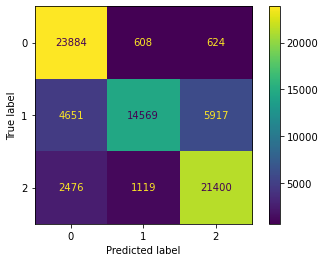

In [172]:
mul = MultinomialNB()
clf1=mul.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
plot_confusion_matrix(clf1,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))

# Model2:-LogisticRegression

In [124]:
lr=LogisticRegression()

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     47538
           1       0.91      0.88      0.90     47523
           2       0.93      0.91      0.92     47303

    accuracy                           0.92    142364
   macro avg       0.92      0.92      0.92    142364
weighted avg       0.92      0.92      0.92    142364

accuracy: 0.9178233261217723
recall: 0.9178233261217723
f1-score: 0.9176227864846029
precision: 0.9181141545962442


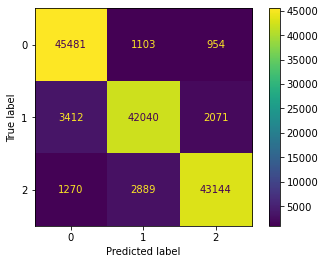

In [158]:
clf=lr.fit(X_train,y_train)
y_pred=clf.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))


# Model3:- DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     47538
           1       0.91      0.90      0.90     47523
           2       0.92      0.90      0.91     47303

    accuracy                           0.91    142364
   macro avg       0.91      0.91      0.91    142364
weighted avg       0.91      0.91      0.91    142364

accuracy: 0.9068303784664662
recall: 0.9068303784664662
f1-score: 0.9067849898515447
precision: 0.9069690809216975


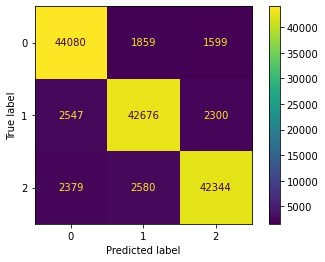

In [130]:
dtc=DecisionTreeClassifier()
clf2=dtc.fit(X_train,y_train)
y_pred=clf2.predict(X_test)
plot_confusion_matrix(clf2,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))


# Model4:- RandomForestClassifier

In [128]:
rfc=RandomForestClassifier()
clf3=rfc.fit(X_train,y_train)
y_pred=clf3.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))


# Model5:- AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier()
clf4=ada.fit(X_train,y_train)
y_pred=clf4.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))
print('precision:', precision_score(y_test, y_pred, average='weighted'))


NAIVE BYES:-
accuracy: 0.8992865587111318
,recall: 0.8992865587111318
,f1-score: 0.8988015000127976
,precision: 0.9081139702275913
LOGGISTIC :-accuracy: 0.9084829406427845
,recall: 0.9084829406427845
,f1-score: 0.9082935176131418
,precision: 0.9095375176588235
DECISION TREE:-accuracy: 0.87748467269678
,recall: 0.87748467269675
,f1-score: 0.87735676108388
,precision: 0.8778654896630
RANDOM FOREST:-accuracy: 0.9795315206334
,recall: 0.9795315206334
,f1-score: 0.979449345425
,precision: 0.9797251295525
ADA BOOST:-accuracy: 0.6627924559425947
,recall: 0.6627924559425947
,f1-score: 0.6604988647303149
,precision: 0.6615292203531358

# Observation:- we get to know that the Model 2 :-LogisticRegression gives the highest values 
accuracy: 0.9084829406427845
recall: 0.9084829406427845
f1-score: 0.9082935176131418
precision: 0.9095375176588235
    so,Model 2 is best fit model for our BALANCE DataSet

**FINAL CONCLUSION **

IMBALANCE DATASETS LOGISTIC REGRESSION MODEL VALUES:-
accuracy: 0.9069767441860465
recall: 0.9069767441860465
f1-score: 0.889477614208318
precision: 0.8893875929222128

BALANCE DATASETS LOGISTIC REGRESSION MODEL VALUES:-
accuracy: 0.9084829406427845
recall: 0.9084829406427845
f1-score: 0.9082935176131418
precision: 0.9095375176588235

SO THERE IS NOT THAT MUCH DIFFERENCE BETWEEN THE BALANCE AND INBALANCE DATA LOGISTIC MODEL


In [111]:
spacy_stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'did',
 'do',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'few',
 'fifteen',
 'fifty',
 'first',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'go',
 'had',
 'has',
 'have',
 'he',
 'h

****

# NOW, On the Base Of Our Model We will Predict our  Future Sentiments 

In [105]:
def sentimeny1(f):
    if f['Prediction'] == 0 :
        value = 'Negative'
    elif f['Prediction'] == 1:
      value = 'Neutral'
    else:
        value = 'Positive'
    return value

In [106]:
X_train

101821    great guitar material wont harm sensitive fini...
67623     thoughout years tried expensive complicated as...
49173                     does headshell problemsrecomended
11974     ernie ball strings years high quality string g...
5578                                    expectedas expected
                                ...                        
97165     ive come guitar gig bags love light weight por...
79556     good ui easy pick little looking manual dont k...
49037        wow helps trying figure chords songsfive stars
29856     absolutely love strings telecaster stratocaste...
53610     tuner awesome accurate noticeable price best d...
Name: review, Length: 79884, dtype: object

In [107]:
clf12=LogisticRegression()

In [112]:
vec=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=spacy_stopwords,use_idf=True,smooth_idf=True)
X_train1=vec.fit_transform(X_train)
X_test1=vec.transform(X_test)


In [113]:
clf12.fit(X_train1,y_train)

LogisticRegression()

In [114]:
x=vec.transform(df.review)

In [115]:
df['Prediction']=clf12.predict(x)

In [116]:
df['Prediction']=df.apply(sentimeny1,axis=1)
df['Prediction'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

# Seprating the Sentiments

In [117]:
review_pos = df[(df.Prediction=='Positive')&(df.sentiment=='Positive')]
review_neg = df[(df.Prediction=='Negative')&(df.sentiment=='Negative')]
review_neu = df[(df.Prediction=='Neutral')&(df.sentiment=='Neutral')]

In [118]:
print('Positive reviews:',review_pos.shape[0])
print('Negative reviews:',review_neg.shape[0])
print('Neutral reviews:',review_neu.shape[0])

Positive reviews: 82611
Negative reviews: 4550
Neutral reviews: 17922


In [119]:
print('Positive reviews:')
display(review_pos.head(3))
print('\nNegative reviews:')
display(review_neg.head(3))
print('\nNeutral reviews:')
display(review_neu.head(3))

Positive reviews:


,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style,polarity,sentiment,Prediction
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Electronics,0.400000,Positive,Positive
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Electronics,0.354618,Positive,Positive
5,3.0,True,2016-06-30,A3OULY1DYPR5R8,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,returned ok music ole ole lessons persist youl...,Electronics,0.333333,Positive,Positive



Negative reviews:


,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style,polarity,sentiment,Prediction
59,1.0,True,2017-04-17,A2XP1F29W6TIZO,B00005ML71,"['Musical Instruments', 'Instrument Accessorie...",Yamaha,Musical Instruments,14.35,useless guitar ampone star,Compact Sustain Pedal,-0.5,Negative,Negative
60,5.0,True,2017-04-12,A377VYDXWRN4BN,B00005ML71,"['Musical Instruments', 'Instrument Accessorie...",Yamaha,Musical Instruments,14.35,works yamaha keyboard like heavy weight feelpe...,Compact Sustain Pedal,-0.2,Negative,Negative
75,3.0,True,2016-12-15,A1HFYEZ8WXEMK7,B00005ML71,"['Musical Instruments', 'Instrument Accessorie...",Yamaha,Musical Instruments,14.35,returned item wont work yamaha keyboard wrong ...,Compact Sustain Pedal,-0.5,Negative,Negative



Neutral reviews:


,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style,polarity,sentiment,Prediction
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Electronics,0.0,Neutral,Neutral
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Electronics,0.0,Neutral,Neutral
9,1.0,True,2016-02-21,A2053ZJUGCKUA5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,not likesent refundone star,Electronics,0.0,Neutral,Neutral



# Clustering

In [120]:
df.head(5)

,Rating,verified,reviewTime,reviewerID,asin,category,brand,main_cat,price,review,Style,polarity,sentiment,Prediction
0,4.0,True,2017-05-19,AV9E7SJWU0PQ9,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,far works designed needs ridges help develope ...,Electronics,0.100000,Positive,Neutral
1,3.0,True,2017-05-01,A3CEV9KBYLPK2L,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,didnt fit guitar okdidnt fit guitar,Electronics,0.400000,Positive,Positive
2,4.0,True,2017-01-27,A2ZPY4IM17L09F,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,simplewe seefour stars,Electronics,0.000000,Neutral,Neutral
3,5.0,True,2017-01-10,AUKVM8TXMBUR5,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,im thrilled system learning guitar ive wanted ...,Electronics,0.354618,Positive,Positive
4,4.0,True,2016-10-26,A1M5X1ILU4ZOWT,1480360295,"['Musical Instruments', 'Instrument Accessorie...",ChordBuddy,Musical Instruments,6.04,helped learning play chords easefour stars,Electronics,0.000000,Neutral,Neutral


In [126]:
final_data=pd.DataFrame(df.groupby(by=['asin'])['Style','brand','price','Rating','sentiment','Prediction'].agg(st.mode))
final_data

,Style,brand,price,Rating,sentiment,Prediction
asin,,,,,,
1480360295,Electronics,ChordBuddy,6.04,4.0,Positive,Positive
9792372326,K10 Speaker,QSC,125.99,5.0,Positive,Positive
B00005ML71,Compact Sustain Pedal,Yamaha,14.35,5.0,Positive,Positive
B000068NSS,Red,Fender,15.99,5.0,Positive,Positive
B000068NSX,Lake Placid Blue,Fender,19.99,5.0,Positive,Positive
...,...,...,...,...,...,...
B01HG0FXAI,Electric Guitar,Fender,125.99,5.0,Positive,Positive
B01HG293XO,Korg PLUGKEYBK -Channel Audio Plug-In,Korg,14.99,5.0,Positive,Positive
B01HGLUP14,Male to 2 Female,Vandesail,0.91,5.0,Positive,Positive


In [129]:
df1=final_data.copy()
final_data['Prediction'].value_counts()

Positive    3691
Neutral       92
Negative       7
Name: Prediction, dtype: int64

### Label Encoding

In [150]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['brand_label'] = encoder.fit_transform(df1['brand'])
df1['Style_label'] = encoder.fit_transform(df1['Style'])
df1['sentiment_label'] = encoder.fit_transform(df1['sentiment'])
df1['Predicted_label']= encoder.fit_transform(df1['Prediction'])
df1.head()

,asin,Style,brand,price,Rating,sentiment,Prediction,brand_label,sentiment_label,Predicted_label,Style_label
0,1480360295,Electronics,ChordBuddy,6.04,4.0,Positive,Positive,-1.163836,2,2,889
1,9792372326,K10 Speaker,QSC,125.99,5.0,Positive,Positive,0.829610,2,2,1065
2,B00005ML71,Compact Sustain Pedal,Yamaha,14.35,5.0,Positive,Positive,1.796727,2,2,771
3,B000068NSS,Red,Fender,15.99,5.0,Positive,Positive,-0.690146,2,2,1434
4,B000068NSX,Lake Placid Blue,Fender,19.99,5.0,Positive,Positive,-0.690146,2,2,1106


In [132]:
df1.describe()

,price,Rating,brand_label,sentiment_label,Predicted_label
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,32.874945,4.911082,353.867810,1.956728,1.972032
std,47.246573,0.402891,202.690917,0.224463,0.175750
min,0.910000,1.000000,0.000000,0.000000,0.000000
25%,7.990000,5.000000,196.000000,2.000000,2.000000
50%,16.122273,5.000000,338.500000,2.000000,2.000000
75%,39.857500,5.000000,517.000000,2.000000,2.000000
max,809.990000,5.000000,746.000000,2.000000,2.000000


### Data Scaling

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1['brand_label'] = scaler.fit_transform(df1[['brand_label']])
df1.head()

,Style,brand,price,Rating,sentiment,Prediction,brand_label,sentiment_label,Predicted_label
asin,,,,,,,,,
1480360295,Electronics,ChordBuddy,6.04,4.0,Positive,Positive,-1.163836,2,2
9792372326,K10 Speaker,QSC,125.99,5.0,Positive,Positive,0.829610,2,2
B00005ML71,Compact Sustain Pedal,Yamaha,14.35,5.0,Positive,Positive,1.796727,2,2
B000068NSS,Red,Fender,15.99,5.0,Positive,Positive,-0.690146,2,2
B000068NSX,Lake Placid Blue,Fender,19.99,5.0,Positive,Positive,-0.690146,2,2


### Modeling

In [136]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score

In [137]:
model_df=df1.loc[:,['Rating','brand','price','sentiment_label','Predicted_label']]

In [139]:
kmeans = KMeans(n_clusters=3, random_state=10)
y_kmeans = kmeans.fit_predict(model_df[['Rating','sentiment_label','Predicted_label']])

df_pred=pd.DataFrame(model_df[['Rating','sentiment_label','Predicted_label']],columns=['Rating','sentiment_label','Predicted_label'])
df_pred['kmeans_pred']=y_kmeans


In [140]:
df_pred

,Rating,sentiment_label,Predicted_label,kmeans_pred
asin,,,,
1480360295,4.0,2,2,2
9792372326,5.0,2,2,1
B00005ML71,5.0,2,2,1
B000068NSS,5.0,2,2,1
B000068NSX,5.0,2,2,1
...,...,...,...,...
B01HG0FXAI,5.0,2,2,1
B01HG293XO,5.0,2,2,1
B01HGLUP14,5.0,2,2,1


In [148]:
df1.reset_index(inplace=True)
df1.head()

,asin,Style,brand,price,Rating,sentiment,Prediction,brand_label,sentiment_label,Predicted_label
0,1480360295,Electronics,ChordBuddy,6.04,4.0,Positive,Positive,-1.163836,2,2
1,9792372326,K10 Speaker,QSC,125.99,5.0,Positive,Positive,0.829610,2,2
2,B00005ML71,Compact Sustain Pedal,Yamaha,14.35,5.0,Positive,Positive,1.796727,2,2
3,B000068NSS,Red,Fender,15.99,5.0,Positive,Positive,-0.690146,2,2
4,B000068NSX,Lake Placid Blue,Fender,19.99,5.0,Positive,Positive,-0.690146,2,2


In [154]:
df1['kmeans_pred']=y_kmeans
df1

,asin,Style,brand,price,Rating,sentiment,Prediction,brand_label,sentiment_label,Predicted_label,Style_label,kmeans_pred
0,1480360295,Electronics,ChordBuddy,6.04,4.0,Positive,Positive,-1.163836,2,2,889,2
1,9792372326,K10 Speaker,QSC,125.99,5.0,Positive,Positive,0.829610,2,2,1065,1
2,B00005ML71,Compact Sustain Pedal,Yamaha,14.35,5.0,Positive,Positive,1.796727,2,2,771,1
3,B000068NSS,Red,Fender,15.99,5.0,Positive,Positive,-0.690146,2,2,1434,1
4,B000068NSX,Lake Placid Blue,Fender,19.99,5.0,Positive,Positive,-0.690146,2,2,1106,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3785,B01HG0FXAI,Electric Guitar,Fender,125.99,5.0,Positive,Positive,-0.690146,2,2,885,1
3786,B01HG293XO,Korg PLUGKEYBK -Channel Audio Plug-In,Korg,14.99,5.0,Positive,Positive,0.010521,2,2,1092,1
3787,B01HGLUP14,Male to 2 Female,Vandesail,0.91,5.0,Positive,Positive,1.604290,2,2,1185,1
3788,B01HHJXKRG,Assorted Colors,TC Electronic,17.84,5.0,Positive,Positive,1.357577,2,2,566,1


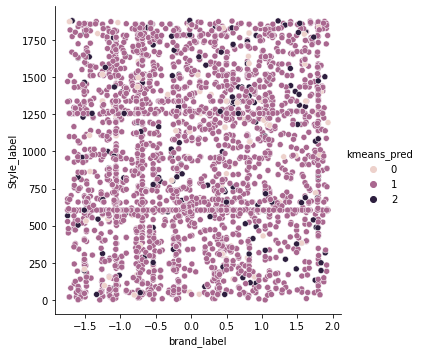

In [156]:
sns.relplot(x=df1['brand_label'],y=df1['Style_label'],hue=df1['kmeans_pred'])

In [174]:
df1['kmeans_pred'].value_counts()

1    3446
2     219
0     125
Name: kmeans_pred, dtype: int64

In [175]:
#Positive Sentiments
df1[(df1['kmeans_pred']==1)]['brand'].value_counts()

Fender                   156
JIM DUNLOP                90
D'Addario Accessories     79
Yamaha                    78
Musiclily                 68
                        ... 
Godlyke Power-All          1
Union                      1
Otto Musica                1
Kustom PA                  1
Westshell                  1
Name: brand, Length: 694, dtype: int64

In [178]:
#Negative Sentiments
df1[(df1['kmeans_pred']==2)]['brand'].value_counts()

Yamaha           7
Gator            5
Andoer           5
Musiclily        5
OnStage          5
                ..
ZT Amplifiers    1
Rapco Horizon    1
Oscar Schmidt    1
Hamano           1
PreSonus         1
Name: brand, Length: 153, dtype: int64

In [160]:
#Neutral Sentiments
df1[(df1['kmeans_pred']==0)]['brand'].value_counts()

Levy's Leathers    5
Musiclily          3
CHAUVET DJ         3
Kmise              3
OnStage            3
                  ..
ToneRite           1
Xotic              1
Venture            1
Hamano             1
PRORECK            1
Name: brand, Length: 97, dtype: int64

In [161]:
#Positive Sentiments
df1[(df1['kmeans_pred']==2)]['Style'].value_counts()

 Black                 23
 MultiColored           7
 Red                    4
 Blue                   4
 1                      3
                       ..
 Round Base             1
 5/8                    1
 Dark Rosewood          1
 Electric Guitar        1
 AR16 - 12 Mic Pres     1
Name: Style, Length: 173, dtype: int64

In [162]:
#Negative Sentiments
df1[(df1['kmeans_pred']==1)]['Style'].value_counts()

 Black                      400
 MultiColored               118
 Original Version            69
 Natural                     50
 Blue                        40
                           ... 
 Straight, Standard Base      1
 Soft                         1
 Fuchsia                      1
 6x4                          1
 Male to 2 Female             1
Name: Style, Length: 1718, dtype: int64

In [163]:
# checking the sentiments

In [166]:
#positive
P1=df1[(df1['kmeans_pred']==2)&(df1['brand']=='Yamaha')|(df1['brand']=='Gator')]

In [173]:
P1.describe()

,price,Rating,brand_label,sentiment_label,Predicted_label,Style_label,kmeans_pred
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,66.571880,4.761905,-0.277860,1.968254,1.984127,838.492063,1.158730
std,72.393455,0.559789,0.739369,0.176731,0.125988,532.979691,0.447443
min,0.910000,2.000000,-0.537183,1.000000,1.000000,5.000000,0.000000
25%,10.120000,5.000000,-0.537183,2.000000,2.000000,392.500000,1.000000
50%,39.700000,5.000000,-0.537183,2.000000,2.000000,844.000000,1.000000
75%,99.990000,5.000000,-0.537183,2.000000,2.000000,1221.000000,1.000000
max,279.990000,5.000000,1.796727,2.000000,2.000000,1873.000000,2.000000


In [171]:
#negative
N1=df1[(df1['kmeans_pred']==1)]

In [172]:
N1.describe()

,price,Rating,brand_label,sentiment_label,Predicted_label,Style_label,kmeans_pred
count,3446.000000,3446.0,3446.000000,3446.0,3446.000000,3446.000000,3446.0
mean,32.856711,5.0,-0.010090,2.0,1.995937,935.257690,1.0
std,47.301295,0.0,0.995617,0.0,0.063619,530.423174,0.0
min,0.910000,5.0,-1.746080,2.0,1.000000,0.000000,1.0
25%,7.990000,5.0,-0.778963,2.0,2.000000,596.250000,1.0
50%,16.467273,5.0,-0.107902,2.0,2.000000,900.500000,1.0
75%,39.552500,5.0,0.795070,2.0,2.000000,1354.750000,1.0
max,809.990000,5.0,1.934887,2.0,2.000000,1878.000000,1.0


## Time Series

In [185]:
df1[df1['brand']=='Fender']

,asin,Style,brand,price,Rating,sentiment,Prediction,brand_label,sentiment_label,Predicted_label,Style_label,kmeans_pred
3,B000068NSS,Red,Fender,15.990000,5.0,Positive,Positive,-0.690146,2,2,1434,1
4,B000068NSX,Lake Placid Blue,Fender,19.990000,5.0,Positive,Positive,-0.690146,2,2,1106,1
260,B0002DUS16,80/20,Fender,7.990000,5.0,Positive,Positive,-0.690146,2,2,481,1
261,B0002DUS8E,Super Bullets,Fender,3.490000,5.0,Positive,Positive,-0.690146,2,2,1640,1
271,B0002DV7U2,Single,Fender,9.990000,5.0,Positive,Positive,-0.690146,2,2,1519,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3347,B00ZWQBACE,Head,Fender,104.990000,5.0,Positive,Positive,-0.690146,2,2,1012,1
3416,B013H1CEO8,White,Fender,136.490000,5.0,Positive,Positive,-0.690146,2,2,1781,1
3609,B01AXJHEQA,Since 1951 T-Shirt,Fender,6.958333,5.0,Positive,Positive,-0.690146,2,2,1518,1
3610,B01AXJHZSM,Blackout Baseball,Fender,0.910000,5.0,Positive,Positive,-0.690146,2,2,657,1
